<a href="https://colab.research.google.com/github/roy2392/breast_cancer_classification/blob/main/Breast_Cancer_Classification_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

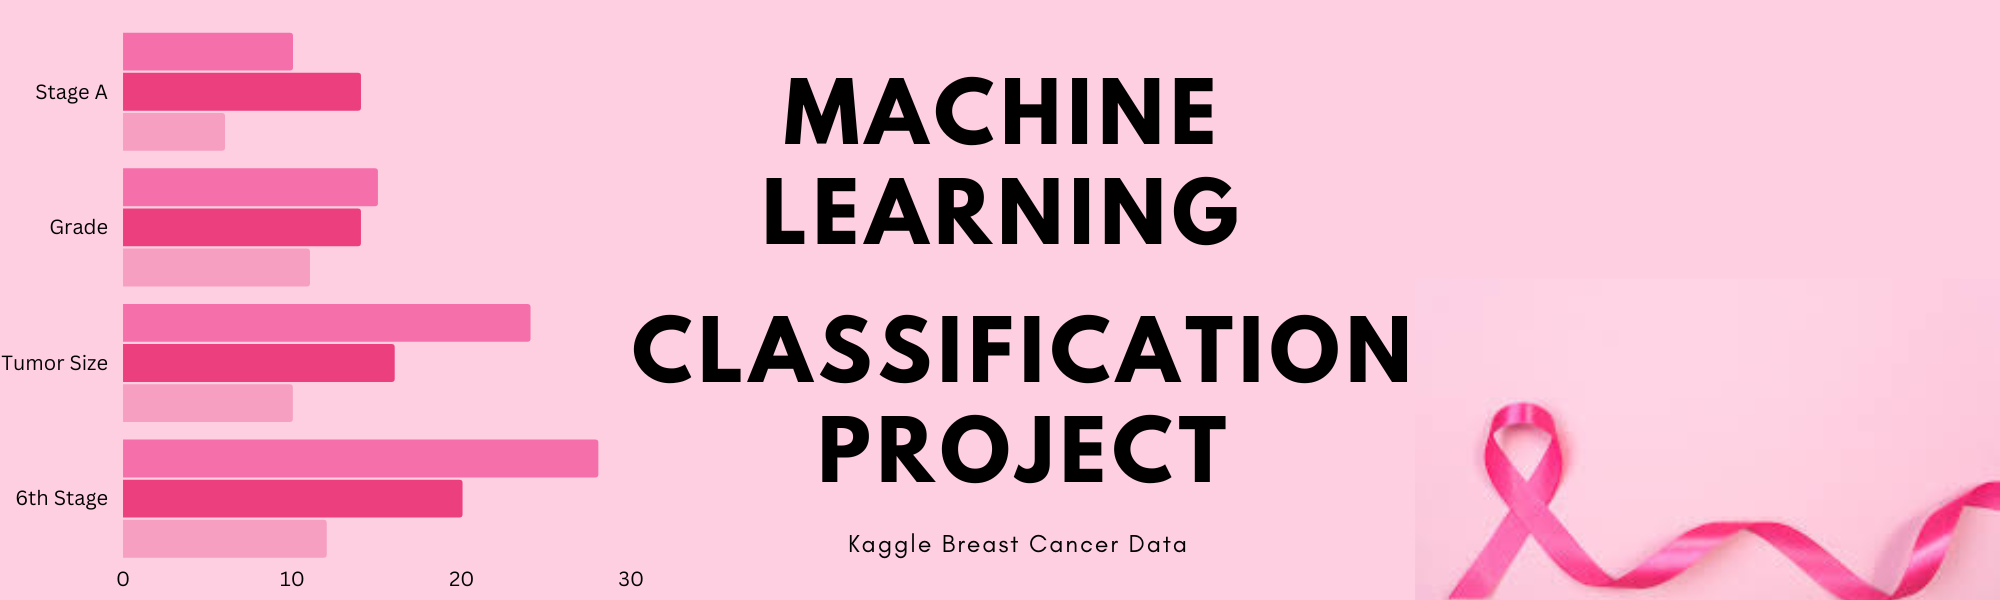

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing

# importing & merging the data

In [1]:
#import Kaggle API
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#upload you kaggle api token (under profil >> settings >> API >> Create nEW Token) 
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
#import the  dataset from kaggle via api
!kaggle datasets download -d reihanenamdari/breast-cancer

  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 30.4MB/s]


In [11]:
#unzip the dataset zip file 
!unzip breast-cancer.zip

Archive:  breast-cancer.zip
  inflating: Breast_Cancer.csv       


In [3]:
df = pd.read_csv('Breast_Cancer.csv')

# Visualization of the data


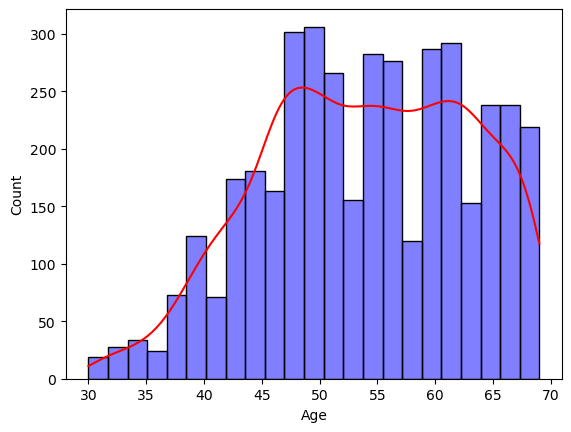

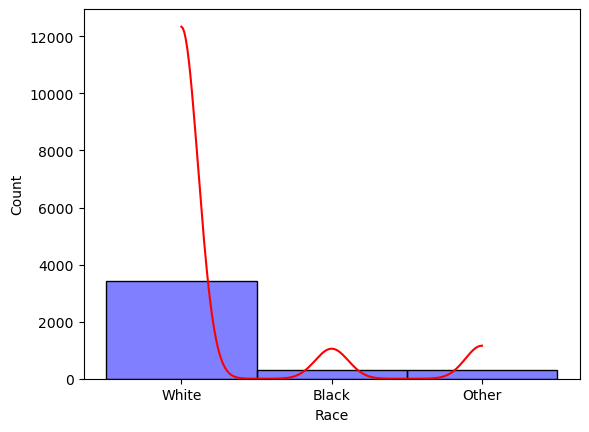

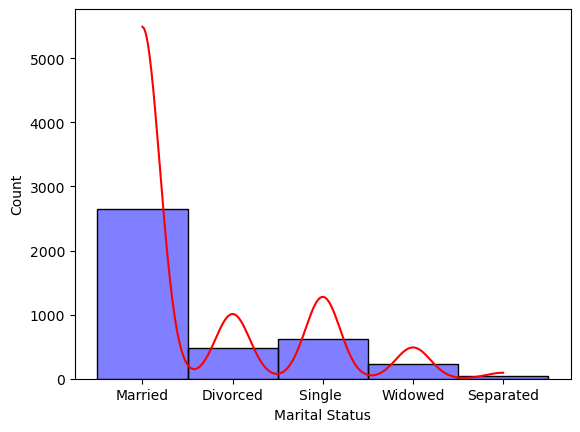

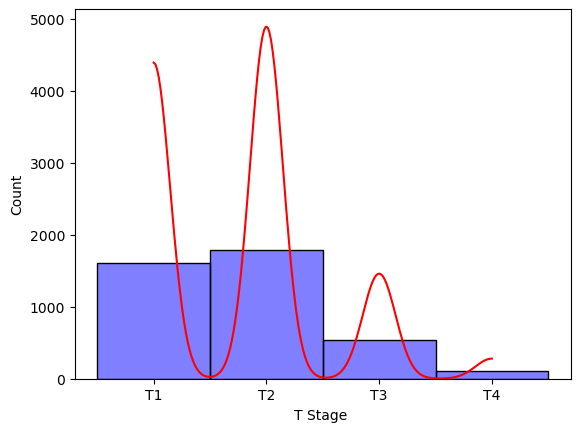

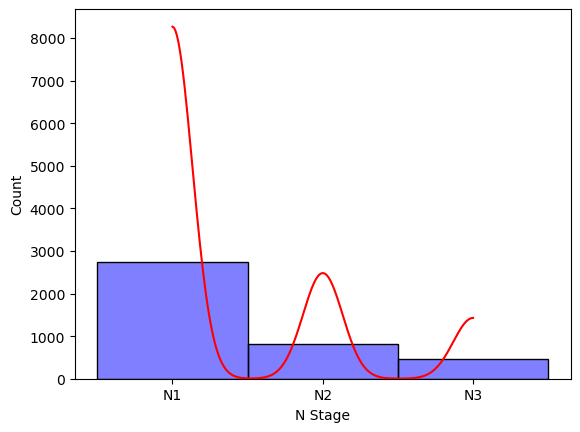

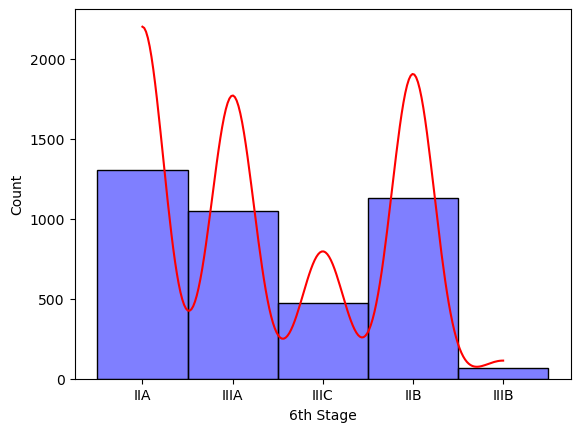

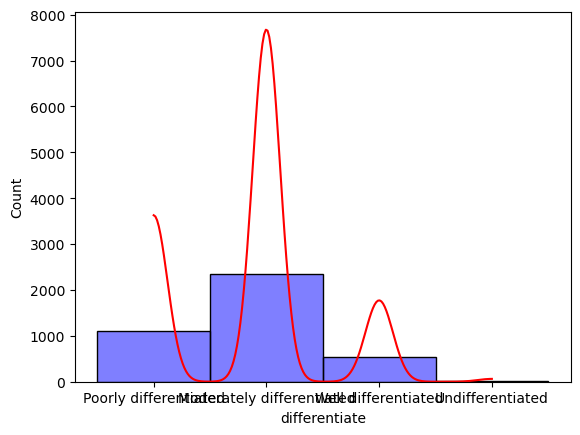

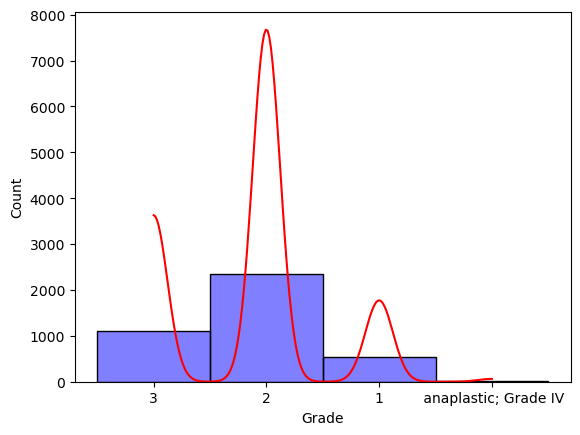

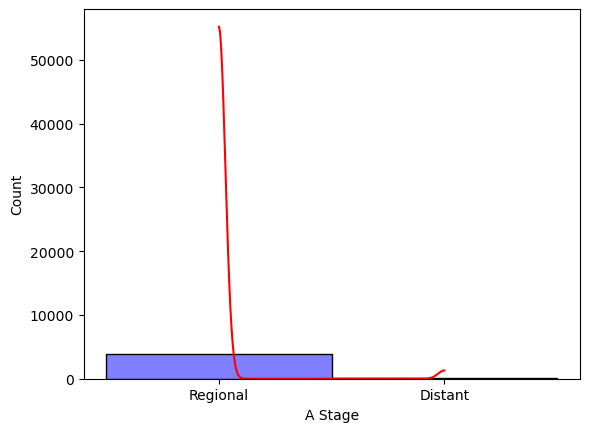

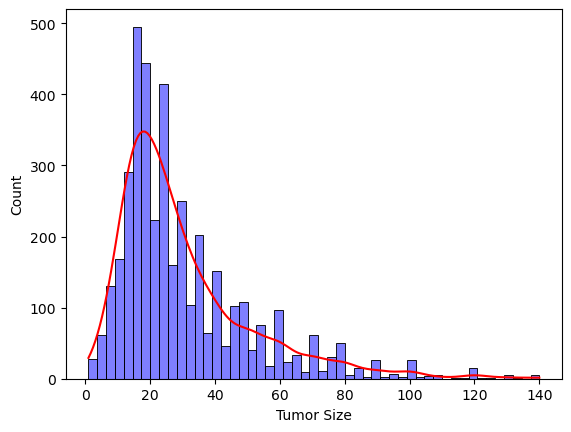

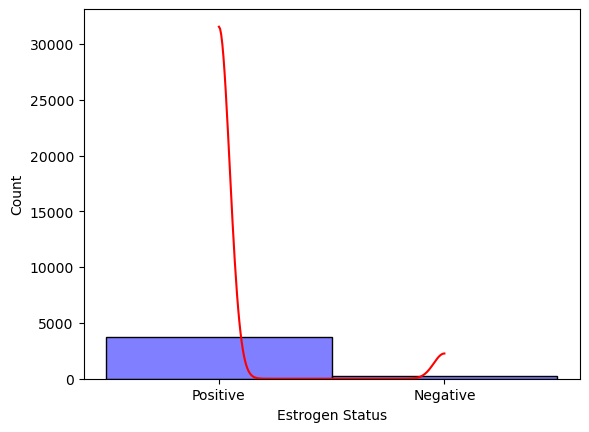

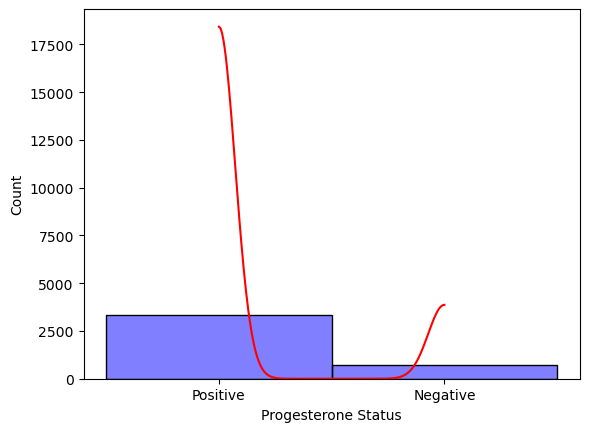

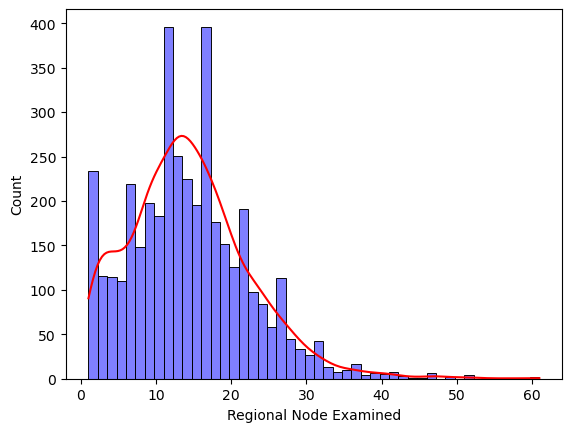

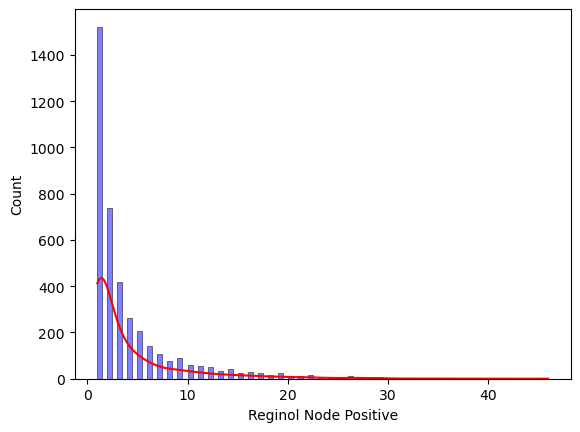

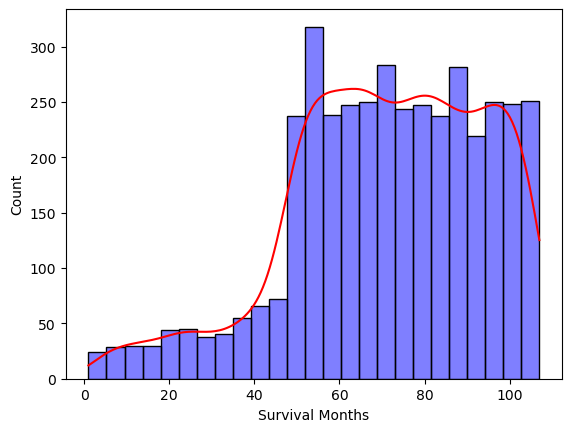

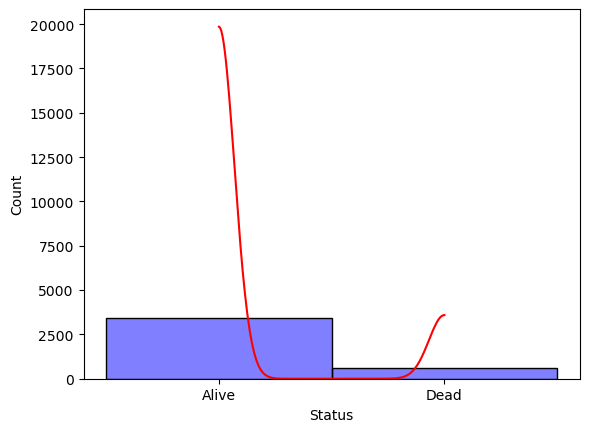

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    ax = sns.histplot(df, x = i, kde = True, color = "blue")
    ax.lines[0].set_color("red")
    plt.show()

In [ ]:
corr_matrix = df.corr().round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.080000,-0.030000,0.010000,-0.010000
Tumor Size,-0.080000,1.000000,0.100000,0.240000,-0.090000
Regional Node Examined,-0.030000,0.100000,1.000000,0.410000,-0.020000
Reginol Node Positive,0.010000,0.240000,0.410000,1.000000,-0.140000
Survival Months,-0.010000,-0.090000,-0.020000,-0.140000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
for i in df.columns: print(i, "  ",df[i].unique())

Age    [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
Race    ['White' 'Black' 'Other']
Marital Status    ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage     ['T1' 'T2' 'T3' 'T4']
N Stage    ['N1' 'N2' 'N3']
6th Stage    ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate    ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade    ['3' '2' '1' ' anaplastic; Grade IV']
A Stage    ['Regional' 'Distant']
Tumor Size    [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  6

categorical variable: Status,Estrogen Status,Progesterone Status,T Stage,N Stage,6th Stage,differentiate,Grade,Race.

In [5]:
data_encoder = preprocessing.OrdinalEncoder(categories = [['T1','T2','T3','T4'],['N1','N2','N3'],['IIA','IIB','IIIA','IIIB','IIIC'],
                                                         ['1','2','3',' anaplastic; Grade IV'],['Regional','Distant'],
                                                         ['Negative','Positive'],['Negative','Positive'],['Alive','Dead']])


In [6]:
df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']] = data_encoder.fit_transform(df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']].values.reshape(-8, 8))

In [7]:
df.Grade = df.Grade+1

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_var = ['Race','Marital Status']
one_hot = OneHotEncoder(sparse=False)#, drop = 'first')
encoder_var_array = one_hot.fit_transform(df[cat_var])
encoder_name = one_hot.get_feature_names_out(cat_var)
encoder_vars_df = pd.DataFrame(encoder_var_array,columns=encoder_name)
df = pd.concat([df,encoder_vars_df],axis=1)
#df.drop(cat_var,axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
data_encoder.categories_

[array(['T1', 'T2', 'T3', 'T4'], dtype=object),
 array(['N1', 'N2', 'N3'], dtype=object),
 array(['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'], dtype=object),
 array(['1', '2', '3', ' anaplastic; Grade IV'], dtype=object),
 array(['Regional', 'Distant'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Alive', 'Dead'], dtype=object)]

In [32]:
corr_matrix = df.corr()[['Grade','A Stage']].round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

,Grade,A Stage
Age,-0.100000,-0.020000
T Stage,0.130000,0.220000
N Stage,0.160000,0.260000
6th Stage,0.190000,0.290000
Grade,1.000000,0.040000
A Stage,0.040000,1.000000
Tumor Size,0.120000,0.120000
Estrogen Status,-0.210000,-0.070000
Progesterone Status,-0.180000,-0.030000
Regional Node Examined,0.080000,0.070000


In [18]:
df.groupby(['Grade']).mean()

,Age,T Stage,N Stage,6th Stage,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Grade,,,,,,,,,,,,
1.0,55.289134,0.620626,0.257827,0.941068,0.018416,26.364641,0.985267,0.913444,12.675875,3.068140,72.937385,0.071823
2.0,54.322416,0.754998,0.401106,1.244577,0.018290,29.729051,0.965121,0.860485,14.387920,3.922586,72.179073,0.129732
3.0,52.615662,0.918992,0.600360,1.659766,0.035104,33.823582,0.843384,0.712871,15.111611,5.154815,68.749775,0.236724
4.0,52.315789,1.315789,0.736842,2.000000,0.000000,44.157895,0.736842,0.789474,14.473684,6.157895,64.421053,0.473684


In [10]:
df.groupby(['A Stage']).mean()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
A Stage,,,,,,,,,,,,
0.0,54.000763,0.758901,0.410732,1.265259,1.146745,30.073499,0.935656,0.828077,14.271617,3.976094,71.543744,0.147762
1.0,52.750000,1.891304,1.619565,3.739130,1.315217,47.576087,0.826087,0.760870,18.010870,11.934783,60.793478,0.380435


<AxesSubplot:xlabel='Grade'>

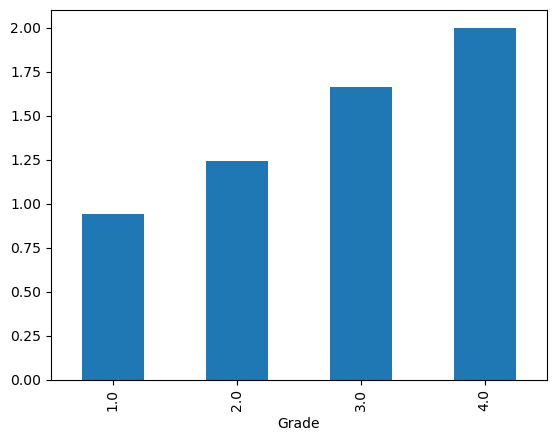

In [19]:
df.groupby(['Grade'])['6th Stage'].mean().plot.bar()

<AxesSubplot:xlabel='A Stage'>

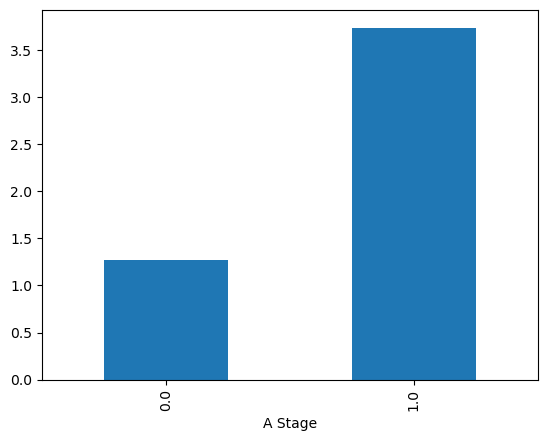

In [20]:
df.groupby(['A Stage'])['6th Stage'].mean().plot.bar()

<AxesSubplot:>

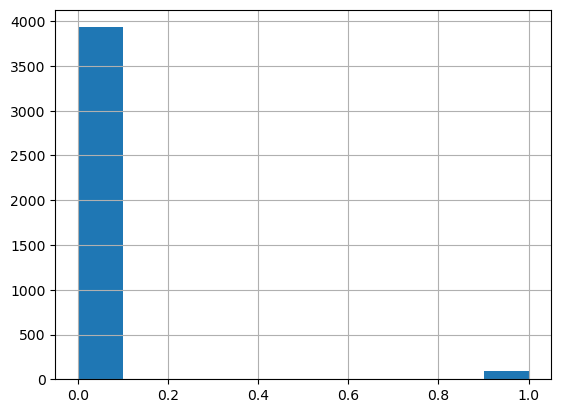

In [21]:
df['A Stage'].hist()

<AxesSubplot:>

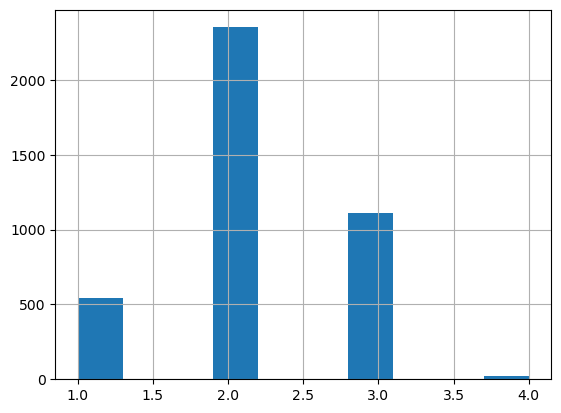

In [22]:
df.Grade.hist()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Race_Black',
       'Race_Other', 'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed'],
      dtype='object')

<AxesSubplot:title={'center':'6th Stage'}, xlabel='Grade'>

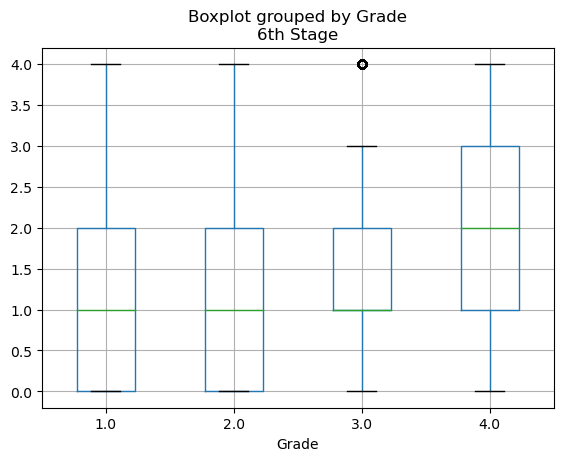

In [12]:
df.boxplot('6th Stage','Grade')


# race and a stage and Grade

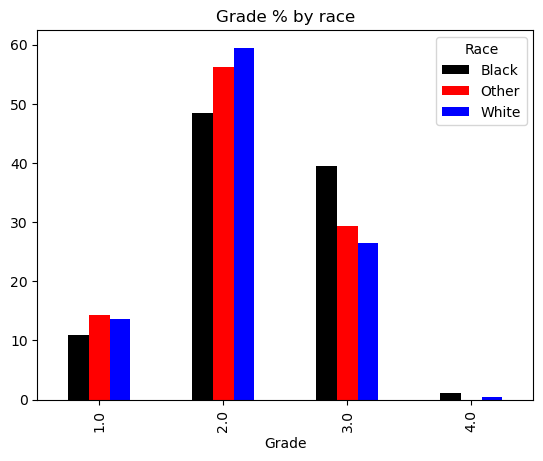

In [95]:
df.groupby(['Grade','Race'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar(color = ('black','red',"blue"))
plt.title(label='Grade % by race', fontsize=12)
plt.show()

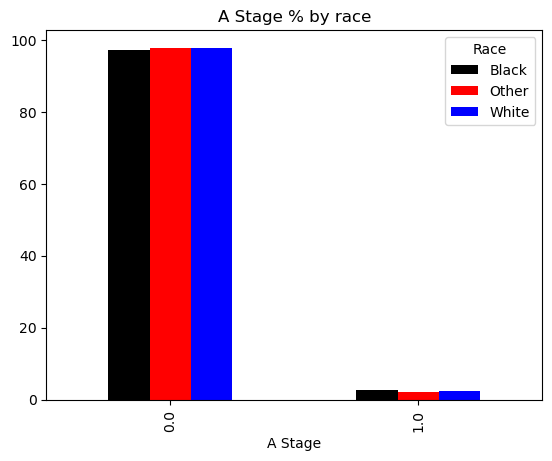

In [96]:
df.groupby(['A Stage','Race'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar(color = ('black','red',"blue"))
plt.title(label='A Stage % by race', fontsize=12)
plt.show()

# marital status and a stage and Grade

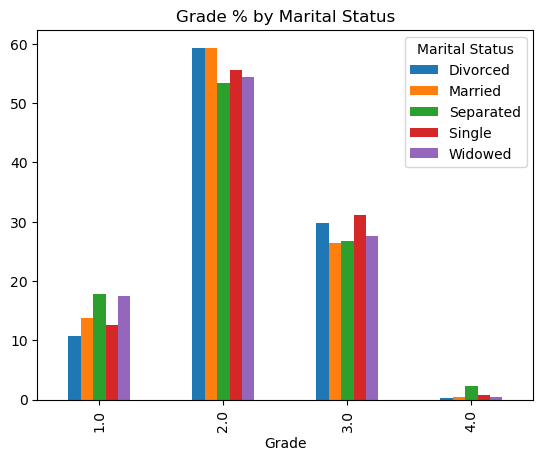

In [98]:
df.groupby(['Grade','Marital Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar()
plt.title(label='Grade % by Marital Status', fontsize=12)
plt.show()

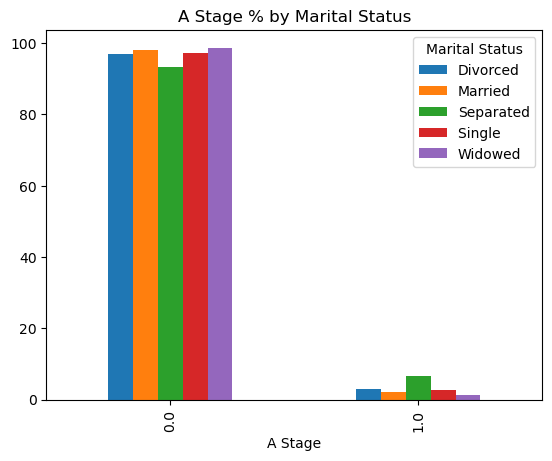

In [99]:
df.groupby(['A Stage','Marital Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar()
plt.title(label='A Stage % by Marital Status', fontsize=12)
plt.show()

In [22]:
df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T

Grade,1.0,2.0,3.0,4.0
6th Stage,,,,
0.0,19.080460,61.379310,19.233716,0.306513
1.0,13.362832,58.672566,27.787611,0.176991
2.0,9.714286,59.523810,30.000000,0.761905
3.0,11.940299,52.238806,35.820896,0.000000
4.0,6.991525,48.093220,43.855932,1.059322


<AxesSubplot:xlabel='Grade', ylabel='6th Stage'>

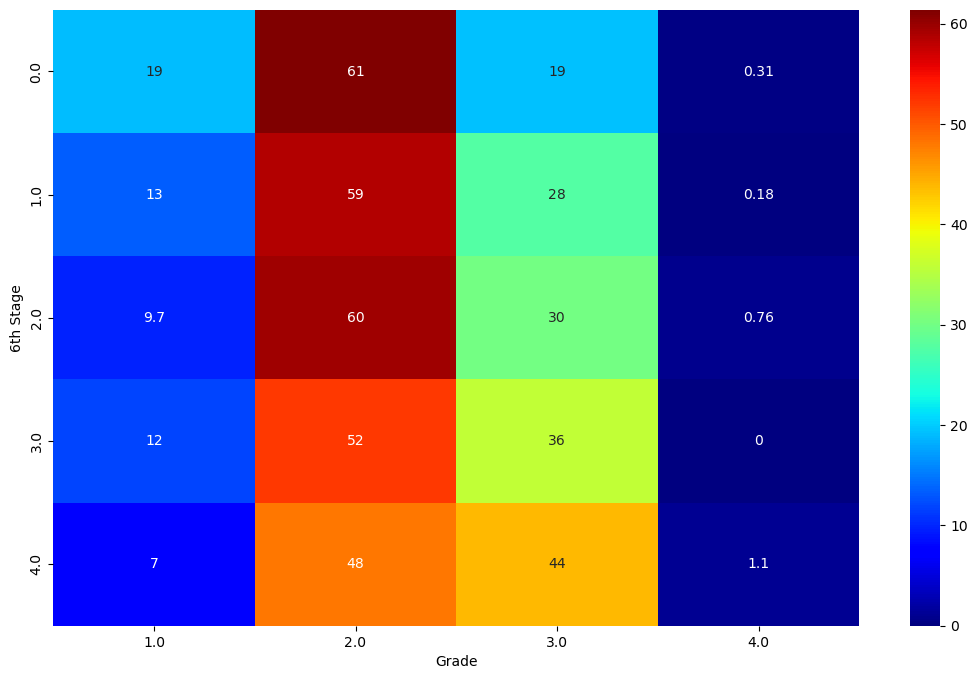

In [23]:

fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)

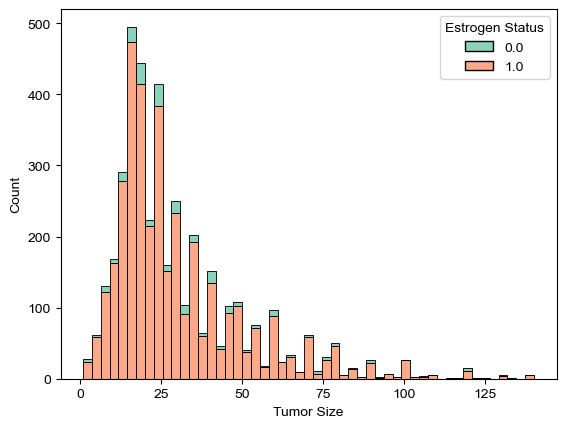

In [24]:
# Set the color palette to a brighter pink palette
sns.set_palette('Set2')

# Create the jointplot with brighter pink colors
sns.histplot(data=df, hue='Estrogen Status', x='Tumor Size', multiple="stack")

# Set the style of the plot
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

plt.show()

<AxesSubplot:title={'center':'Tumor Size'}, xlabel='Estrogen Status'>

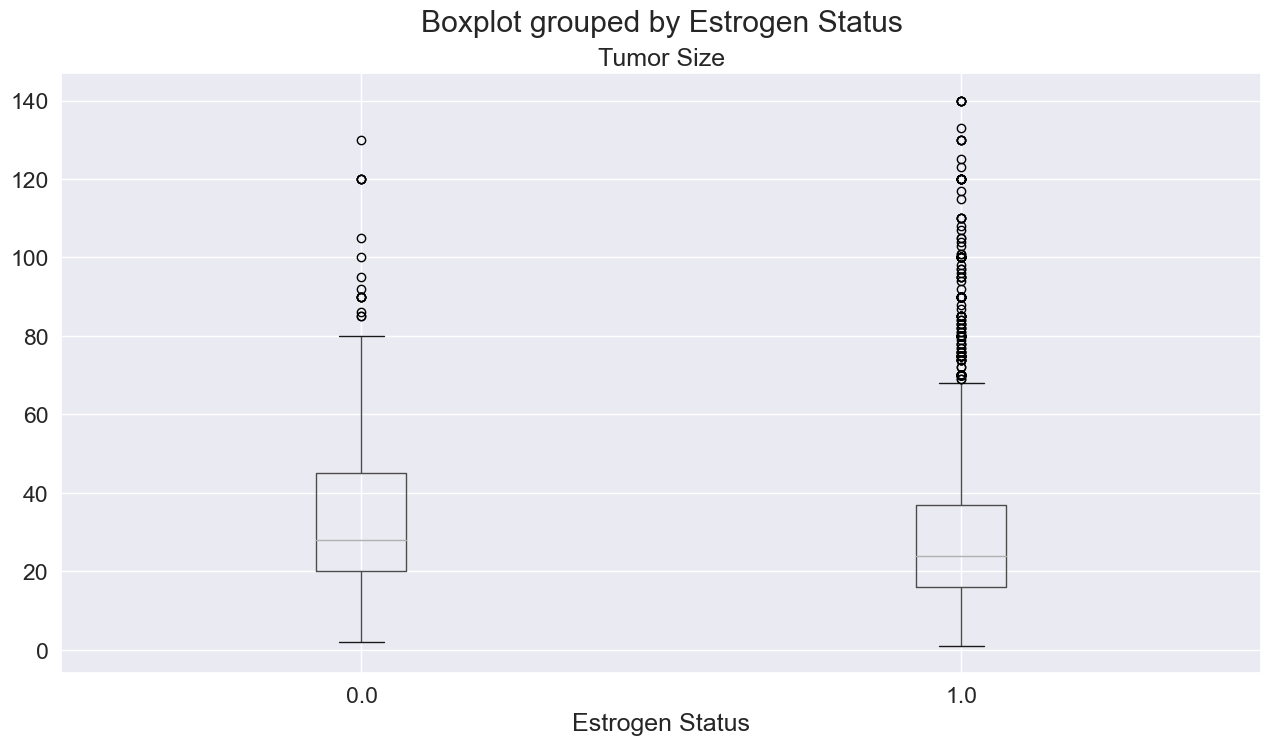

In [28]:
df.boxplot('Tumor Size','Estrogen Status')


<AxesSubplot:title={'center':'Estrogen Status'}, xlabel='Grade'>

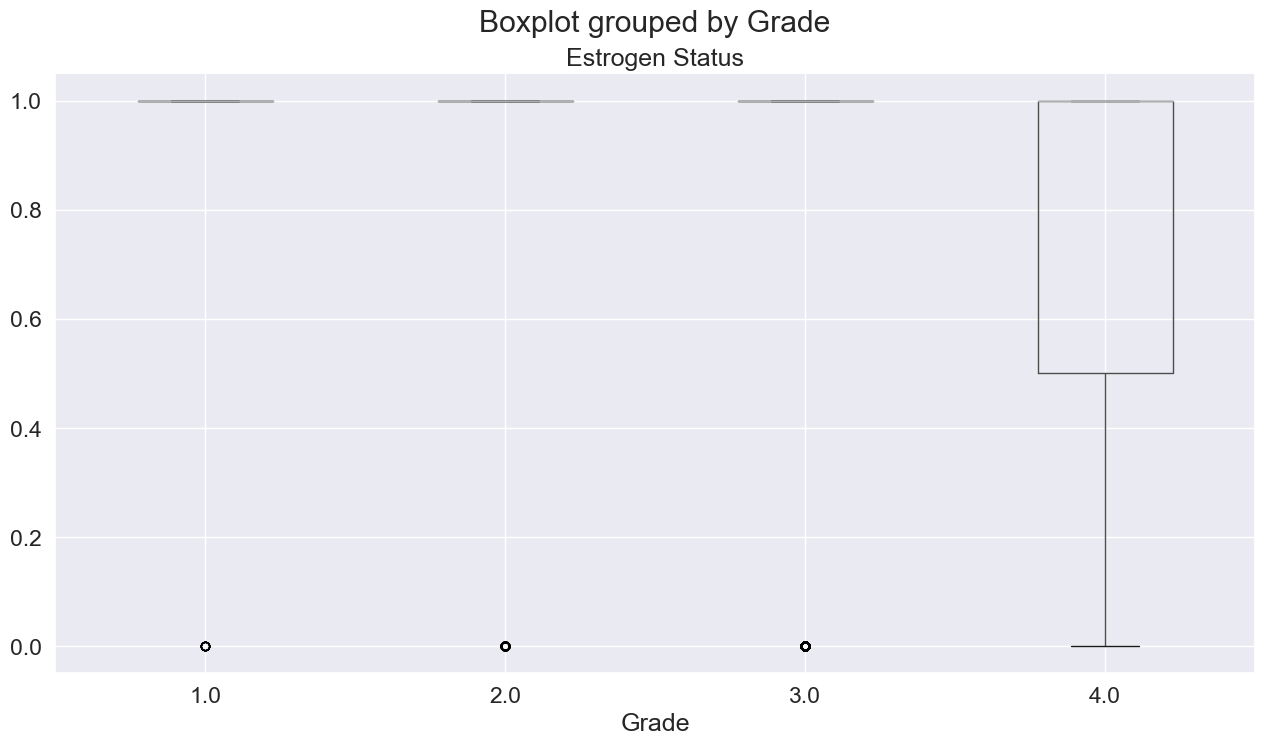

In [30]:
df.boxplot('Estrogen Status','Grade')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


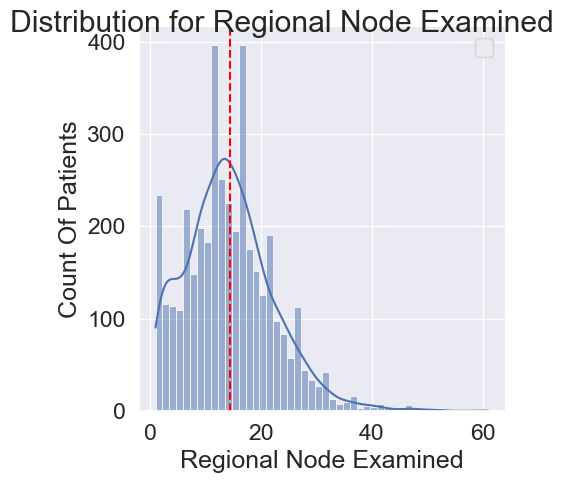

In [25]:
# create the plot
dp = sns.displot(df['Regional Node Examined'], kde=True)

# set the x-label and y-label
dp.set(xlabel='Regional Node Examined', ylabel='Count Of Patients')

# set the title
dp.fig.suptitle('Distribution for Regional Node Examined')


# add a vertical line at the location of the mean price
mean_price = df['Regional Node Examined'].mean()
plt.axvline(mean_price, color='red', linestyle='--')
plt.legend()
plt.show()

In [31]:
df.corr()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,...,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
Age,1.000000,-0.066914,0.002883,-0.018741,-0.099294,-0.020860,-0.077215,0.059787,-0.021269,-0.033345,...,-0.009390,0.055921,-0.043348,-0.083334,0.094113,0.047953,-0.051305,-0.028940,-0.103948,0.209720
T Stage,-0.066914,1.000000,0.277015,0.606711,0.131470,0.221124,0.809176,-0.060954,-0.057633,0.114102,...,-0.085718,0.154699,-0.004230,0.005840,-0.001350,0.023504,-0.035698,0.002113,0.027387,-0.003359
N Stage,0.002883,0.277015,1.000000,0.881880,0.162501,0.260573,0.277905,-0.101995,-0.093723,0.328276,...,-0.139577,0.255772,0.032426,0.004930,-0.027121,0.034042,-0.045754,0.031606,0.000401,0.030541
6th Stage,-0.018741,0.606711,0.881880,1.000000,0.186943,0.291962,0.513971,-0.105614,-0.101246,0.317219,...,-0.144837,0.257636,0.021478,0.011617,-0.024260,0.041908,-0.044044,0.028957,-0.003228,0.022905
Grade,-0.099294,0.131470,0.162501,0.186943,1.000000,0.039459,0.119367,-0.211251,-0.179860,0.084416,...,-0.067669,0.161398,0.067922,-0.000275,-0.048816,0.026064,-0.035291,-0.002877,0.033964,-0.015594
A Stage,-0.020860,0.221124,0.260573,0.291962,0.039459,1.000000,0.123883,-0.065570,-0.026530,0.069010,...,-0.070109,0.096584,0.008646,-0.001943,-0.004776,0.019841,-0.022505,0.031167,0.013582,-0.016823
Tumor Size,-0.077215,0.809176,0.277905,0.513971,0.119367,0.123883,1.000000,-0.059585,-0.069879,0.104352,...,-0.086901,0.134205,0.000644,0.007283,-0.005955,0.020541,-0.028056,-0.001266,0.015492,0.005053
Estrogen Status,0.059787,-0.060954,-0.101995,-0.105614,-0.211251,-0.065570,-0.059585,1.000000,0.513308,-0.044836,...,0.128469,-0.184650,-0.052041,-0.020625,0.053110,0.016759,0.007716,-0.037770,-0.016281,0.003010
Progesterone Status,-0.021269,-0.057633,-0.093723,-0.101246,-0.179860,-0.026530,-0.069879,0.513308,1.000000,-0.018051,...,0.096018,-0.177079,-0.034267,-0.006048,0.029292,-0.011478,0.026891,-0.044902,0.001236,-0.020255
Regional Node Examined,-0.033345,0.114102,0.328276,0.317219,0.084416,0.069010,0.104352,-0.044836,-0.018051,1.000000,...,-0.022054,0.034772,-0.001530,0.012898,-0.008620,0.015391,-0.009878,0.007275,-0.008240,0.007993


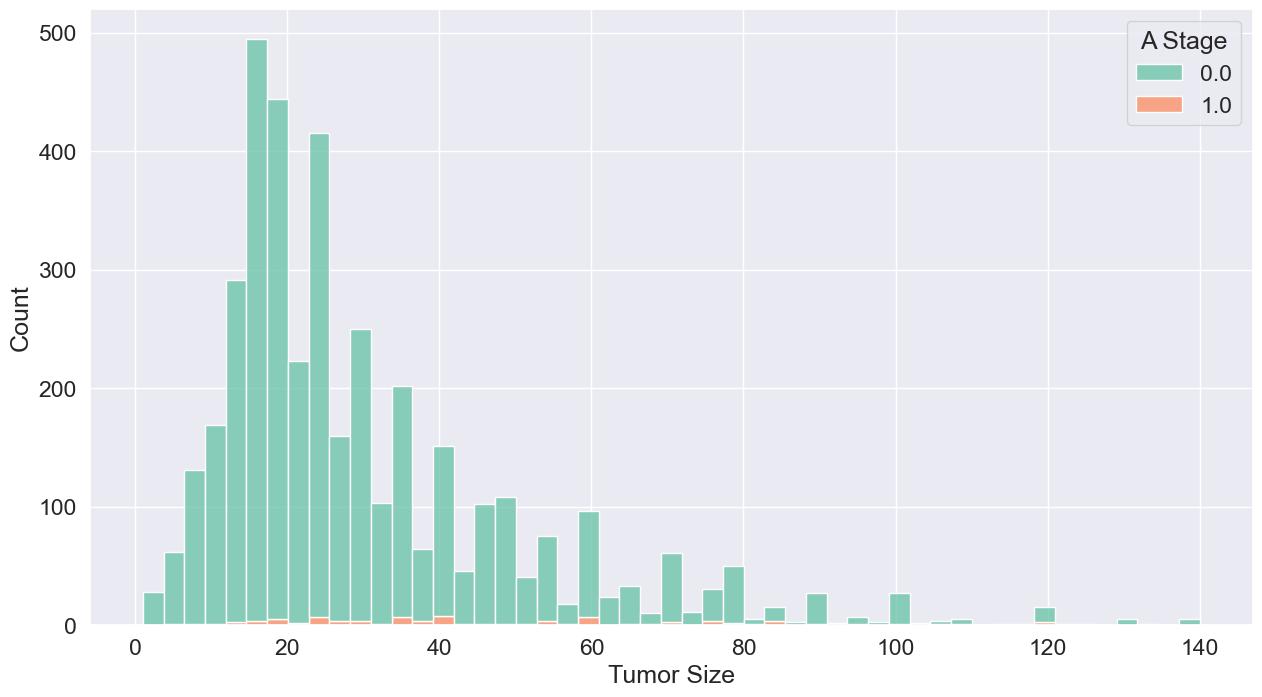

In [26]:
# Set the color palette to a brighter pink palette
sns.set_palette('Set2')

# Create the jointplot with brighter pink colors
sns.histplot(data=df, hue='A Stage', x='Tumor Size', multiple="stack")

# Set the style of the plot
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

plt.show()

In [33]:
df.groupby(['Grade'])['Age'].count()

Grade
1.0     543
2.0    2351
3.0    1111
4.0      19
Name: Age, dtype: int64